<a href="https://colab.research.google.com/github/titaoktvn/timeseries-visualization/blob/main/30_Tita_Oktaviani_P_Time_Series_Analysis_Visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install pandas

In [66]:
!pip install numpy

In [67]:
!pip install matplotlib

In [68]:
!pip install seaborn

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [71]:
# reading the dataset using read_csv
df = pd.read_csv("Microsoft_Stock.csv",
                 parse_dates=True,
                 index_col="Date")

# displaying the first five rows of dataset
df.head()

# Date = Date
# Open = Opening price
# High = Highest value of the day
# Low = Lowest value of the day
# Close = Closing price
# Volume = Number of shares traded on that day

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [72]:
# deleting column
# df.drop(columns='Unnamed: 0', inplace =True)
# df.head()

# Menampilkan nama kolom sebelum penghapusan
# print(df.columns)

# Menghapus kolom jika tersedia
if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)
    print("Kolom 'Unnamed: 0' berhasil dihapus.")
else:
    print("Kolom 'Unnamed: 0' tidak ditemukan dalam DataFrame.")

Kolom 'Unnamed: 0' tidak ditemukan dalam DataFrame.


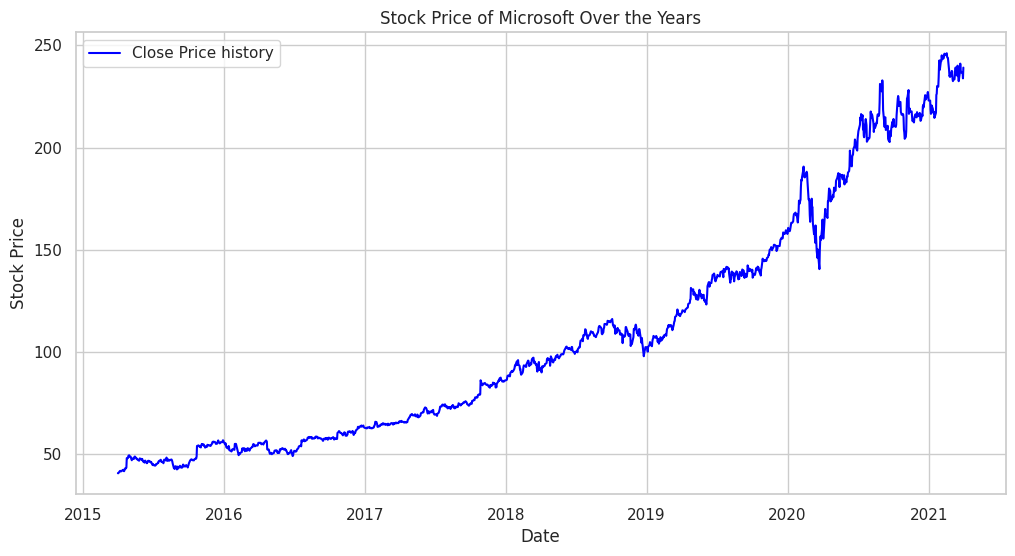

In [73]:
# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='Close Price history', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price of Microsoft Over the Years')

plt.show()

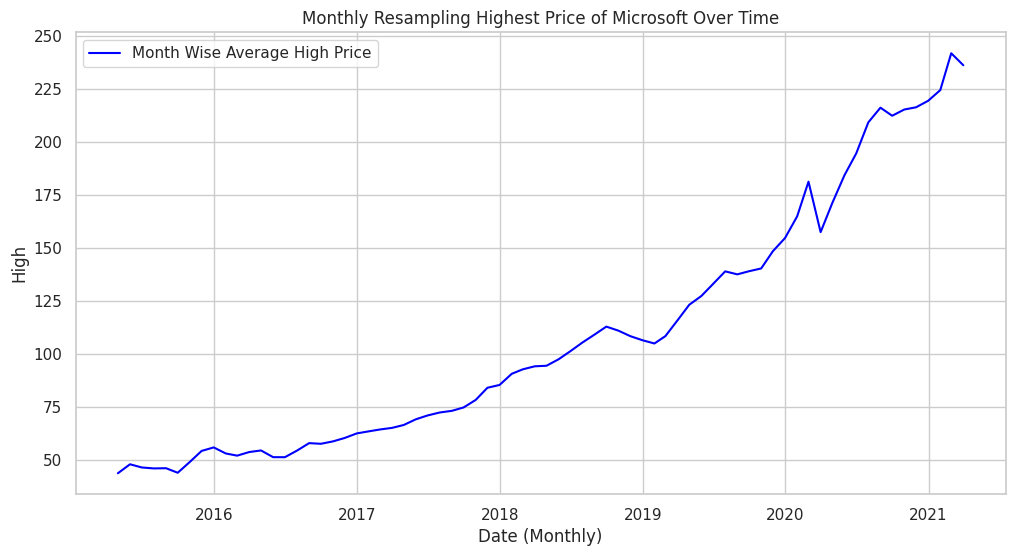

In [74]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean()  # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price of Microsoft Over Time')

plt.show()

<Figure size 1200x600 with 0 Axes>

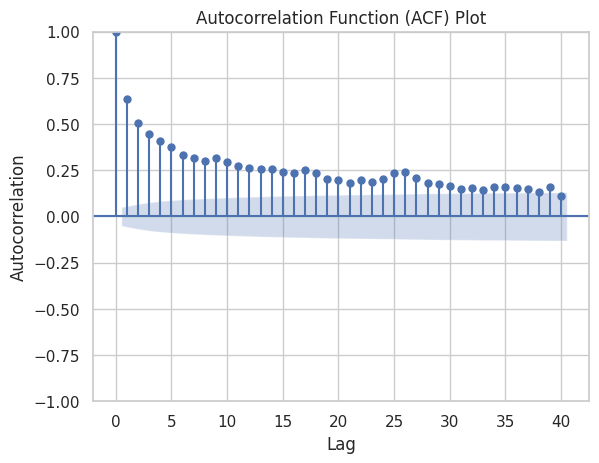

In [75]:
# If 'Date' is a column, but not the index, you can set it as the index
# df.set_index('Date', inplace=True)

# Menampilkan indeks DataFrame
# print(df.index)

# Menampilkan nama kolom
# print(df.columns)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()



In [76]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 1.5704194623040222
p-value: 0.997766061521655
Critical Values: {'1%': -3.4347287139577753, '5%': -2.8634739225299133, '10%': -2.5677995973755325}


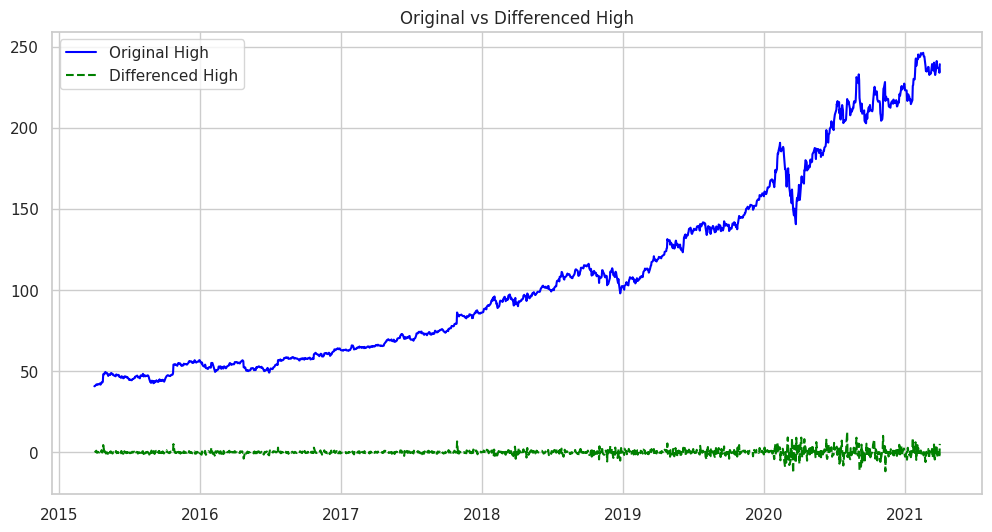

In [77]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

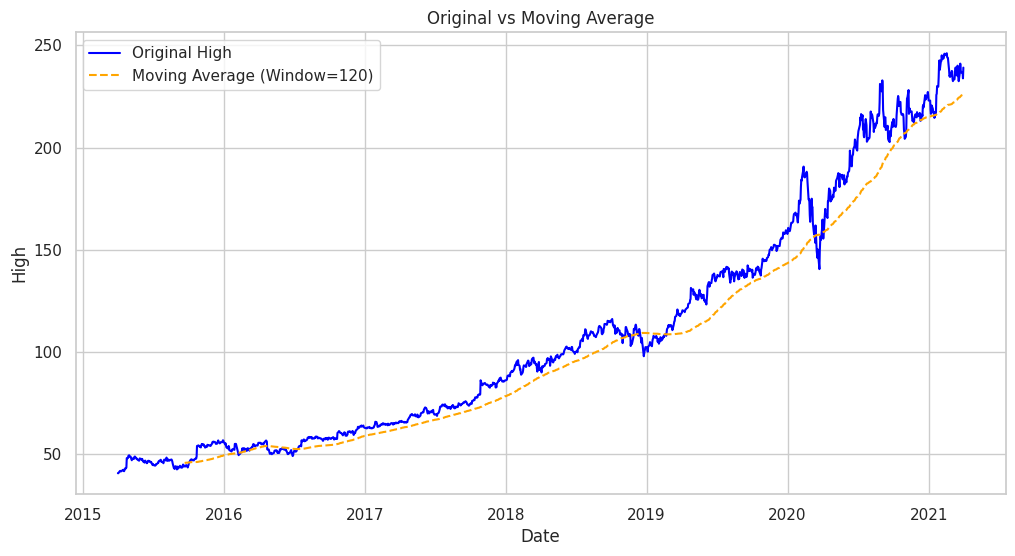

In [78]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [84]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

                      High  high_diff
Date                                 
2015-04-02 16:00:00  40.74      -0.02
2015-04-06 16:00:00  41.78       1.04
2015-04-07 16:00:00  41.91       0.13
2015-04-08 16:00:00  41.69      -0.22
2015-04-09 16:00:00  41.62      -0.07


In [83]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2015-04-02 16:00:00   -0.02
2015-04-06 16:00:00    1.04
2015-04-07 16:00:00    0.13
2015-04-08 16:00:00   -0.22
2015-04-09 16:00:00   -0.07
Name: high_diff, dtype: float64

In [82]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -9.976423755522791
p-value: 2.1715284202007074e-17
Critical Values: {'1%': -3.43476120520139, '5%': -2.863488262178673, '10%': -2.567807233388883}
